In [2]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


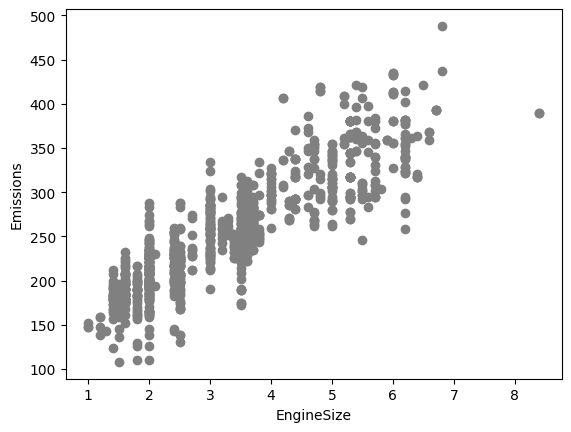

In [9]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="grey")
plt.xlabel("EngineSize")
plt.ylabel("Emissions")
plt.show()

In [13]:
#splitting the data fr training and testing
mask=np.random.rand(len(df))<0.8
train=cdf[mask]
test=cdf[~mask]

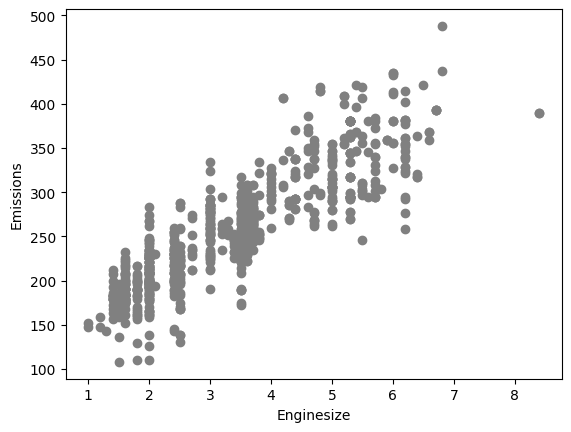

In [14]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='grey')
plt.xlabel("Enginesize")
plt.ylabel("Emissions")
plt.show()

In [19]:
#now training the model
from sklearn import linear_model
regr=linear_model.LinearRegression()
x=np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)

#coefficients
print("The parameters are: ",regr.coef_)

The parameters are:  [[10.3122862   7.49378913  9.81040073]]


In [22]:
#testing the model
y_cap=regr.predict(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
x=np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(test[["CO2EMISSIONS"]])

print("Mean squared error is: %.2f"%np.mean((y_cap-y)**2))
    
#printing the score (max)=1: for good
print("The model score is: %.2f"%regr.score(x,y))

Mean squared error is: 412.42
The model score is: 0.88


/home/rguktvalley/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [23]:
#Assignment
mask=np.random.rand(len(df))<0.8
train=cdf[mask]
test=cdf[~mask]

In [26]:
#training the model
regr=linear_model.LinearRegression()
x=np.asanyarray(train[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)

#printing the co-efficients
print("The parameters are: ",regr.coef_)

The parameters are:  [[ 5.67660818e-03 -1.37143826e+01  2.71864970e+01]]


In [27]:
#testing the model
y_cap=regr.predict(test[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]])
x=np.asanyarray(test[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]])
y=np.asanyarray(test[["CO2EMISSIONS"]])

#printing the error
print("The mean squared error: %.2f"%np.mean((y_cap-y)**2))
#evaluating the score
print("The regression score is: ",regr.score(x,y))

The mean squared error: 729.44
The regression score is:  0.808413114241255


/home/rguktvalley/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**This is the end**